In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [7]:
features = data.drop(['id'], axis = 1)
features.shape

(4000, 2)

In [8]:
from sklearn.cluster import KMeans

In [9]:
my_cluster_model = KMeans(n_clusters=2)


In [10]:
my_cluster_model.fit(features)

KMeans(n_clusters=2)

In [11]:
data['cluster'] = my_cluster_model.labels_

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [13]:
my_cluster_model.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

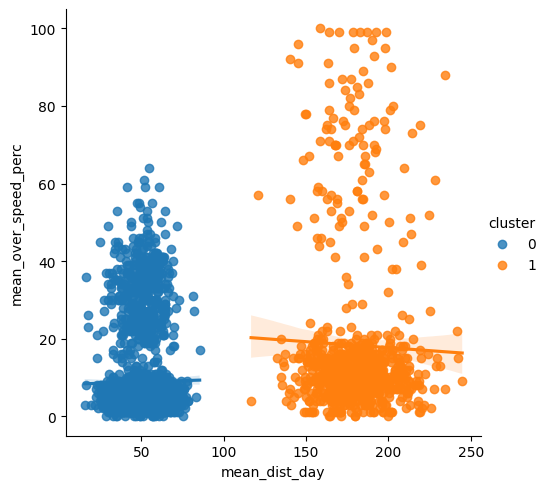

In [16]:
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data, hue='cluster');  #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

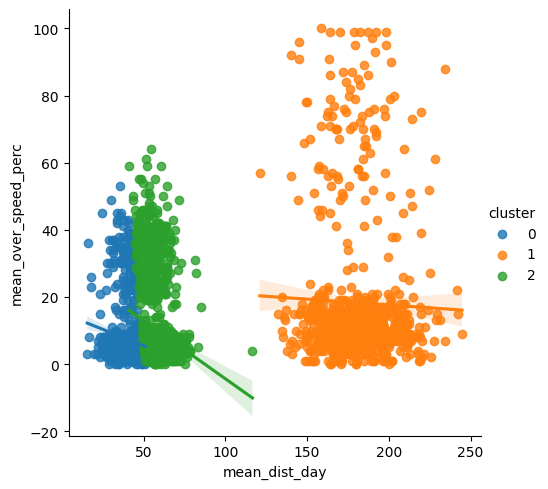

In [18]:
my_cluster_model = KMeans(n_clusters=3)
my_cluster_model.fit(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [19]:
my_cluster_model.cluster_centers_

array([[ 41.38354595,   7.09465021],
       [180.09647059,  18.30788486],
       [ 57.33321859,  10.27653471]])

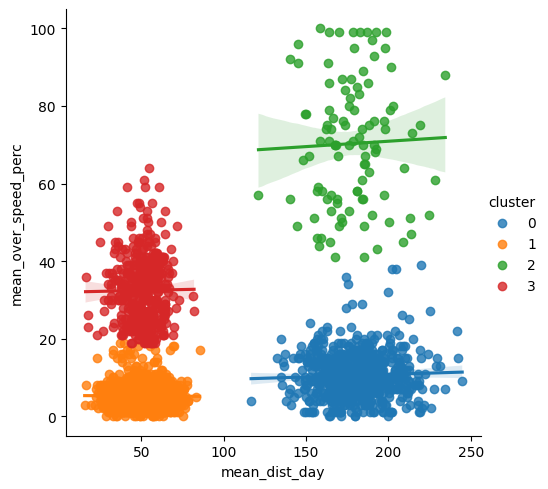

In [21]:
my_cluster_model = KMeans(n_clusters=4)
my_cluster_model.fit(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [ ]:
my_cluster_model.cluster_centers_

array([[ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [ 50.46127059,  32.42823529],
       [177.83509615,  70.28846154]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


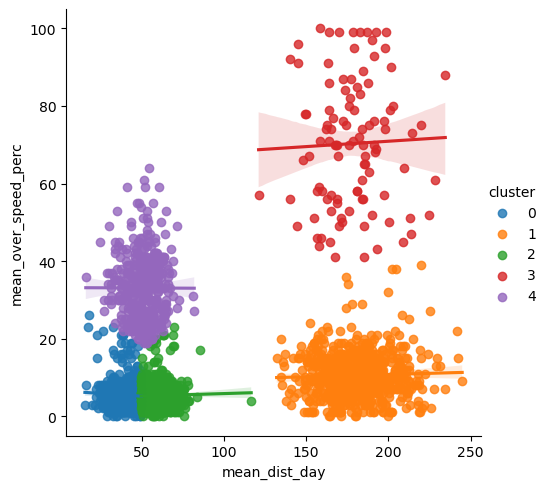

In [ ]:
my_cluster_model = KMeans(n_clusters=5)
my_cluster_model.fit(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [ ]:
my_cluster_model.labels_

array([4, 4, 4, ..., 1, 1, 1])

# Finding K value

In [22]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)  #the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [23]:
wcss

[12184626.129627967,
 1316420.8509477214,
 1043390.7593597203,
 719603.969082251,
 557127.3784730358,
 514357.22877295787,
 330057.868148614,
 297412.5352072353,
 254640.88117073136,
 230560.81182790056]

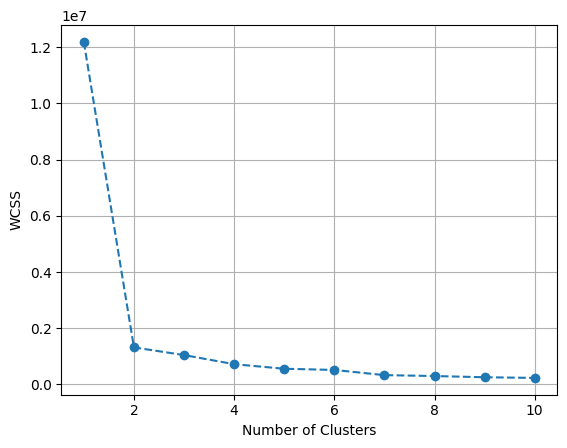

In [24]:
plt.plot(range(1,11),wcss,"o--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

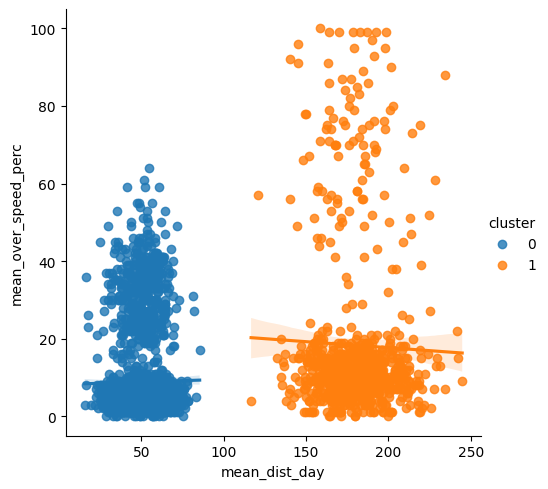

In [27]:
my_cluster_model = KMeans(n_clusters=2)
m = my_cluster_model.fit(features)
data['cluster'] = m.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=data,hue='cluster');
plt.show()

In [28]:
from sklearn.metrics import silhouette_score
# s = (b - a) / max(a, b)

In [29]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    my_cluster_model = KMeans(n_clusters=n_clusters)
    m = my_cluster_model.fit_predict(features)
    silhouette_avg = silhouette_score(features, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.8490223286225532
For n_clusters = 3 The average silhouette_score is : 0.6151910575497205
For n_clusters = 4 The average silhouette_score is : 0.42073329519530817
For n_clusters = 5 The average silhouette_score is : 0.3966432159701645
For n_clusters = 6 The average silhouette_score is : 0.4851761686456124
